# 01 决策树 Decision Tree


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

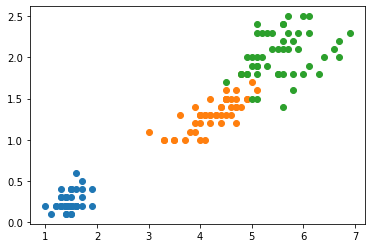

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


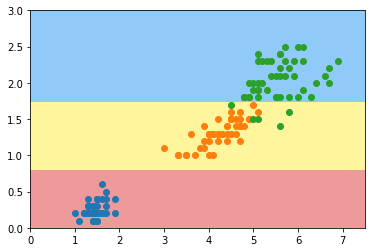

In [8]:
plot_decision_boundary(dt_clf,axis=[0, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

决策树算法：
- 非参数学习算法
- 可以解决分类问题
- 天然的解决多分类问题
- 也可以解决回归问题
- 非常好的可解释性

# 02 信息熵

`熵`在信息论中代表：随机变量不确定度的度量

- 熵越大，数据的不确定性越高
- 熵越小，数据的不确定性越低

信息熵的计算公式：
$$
H=-\sum_{i=1}^{k}{p_i \log(p_i)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def entropy(p):
    return -p * np.log(p) - (1-p) * np.log(1-p)

In [3]:
x = np.linspace(0.001, 0.999, 200)

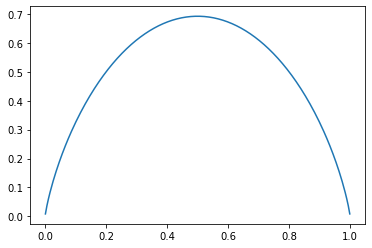

In [4]:
plt.plot(x, entropy(x))
plt.show()

# 03 使用信息熵寻找最优划分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [3]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


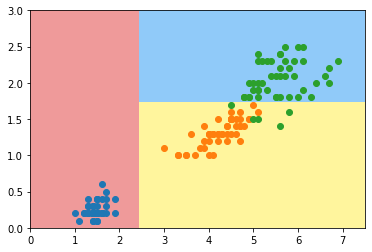

In [5]:
plot_decision_boundary(dt_clf,axis=[0, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [6]:
def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

In [7]:
from collections import Counter
from math import log
def entropy(y):
    counter = Counter(y)
    res = 0.0
    for num in counter.values():
        p = num / len(y)
        res += -p * log(p)
    return res

def try_split(X,y):
    best_entropy = float('inf')
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sort_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sort_index[i-1],d] != X[sort_index[i],d]:
                v = (X[sort_index[i-1],d] + X[sort_index[i],d]) / 2
                x_l, x_r, y_l, y_r = split(X, y, d, v)
                e = entropy(y_l) + entropy(y_r)
                if e < best_entropy:
                    best_entropy, best_d, best_v = e, d, v
    return best_entropy, best_d, best_v

In [8]:
best_entropy, best_d, best_v = try_split(X,y)
print("best_entropy = ", best_entropy)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_entropy =  0.6931471805599453
best_d =  0
best_v =  2.45


In [9]:
X1_1, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
print("entropy(y1_l) = ", entropy(y1_l))
print("entropy(y1_r) = ",entropy(y1_r))

entropy(y1_l) =  0.0
entropy(y1_r) =  0.6931471805599453


In [10]:
best_entropy2, best_d2, best_v2 = try_split(X1_r,y1_r)
print("best_entropy = ", best_entropy2)
print("best_d = ", best_d2)
print("best_v = ", best_v2)

best_entropy =  0.4132278899361904
best_d =  1
best_v =  1.75


In [11]:
X2_1, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)
print("entropy(y2_l) = ", entropy(y2_l))
print("entropy(y2_r) = ",entropy(y2_r))

entropy(y2_l) =  0.30849545083110386
entropy(y2_r) =  0.10473243910508653


# 04 基尼系数

基尼系数:

$$
G = 1-\sum_{i=1}^{k}{p_i^2}
$$

二分类时基尼系数公式：

$$
\begin{array}{l}
G&=1-x^2-(1-x)^2\\
&=1-x^2-1+2x-x^2\\
&=-2x^2+2x
\end{array}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=2,criterion="gini")
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [2]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


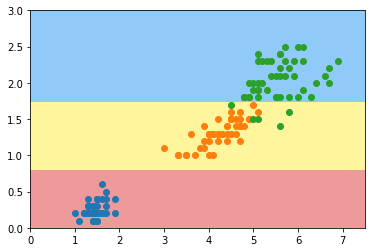

In [3]:
plot_decision_boundary(dt_clf,axis=[0, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [6]:
from collections import Counter
from math import log

def split(X, y, d, value):
    index_a = (X[:,d] <= value)
    index_b = (X[:,d] > value)
    return X[index_a], X[index_b], y[index_a], y[index_b]

def gini(y):
    counter = Counter(y)
    res = 1.0
    for num in counter.values():
        p = num / len(y)
        res -= p**2
    return res

def try_split(X,y):
    best_g = float('inf')#1e9
    best_d, best_v = -1, -1
    for d in range(X.shape[1]):
        sort_index = np.argsort(X[:,d])
        for i in range(1,len(X)):
            if X[sort_index[i-1],d] != X[sort_index[i],d]:
                v = (X[sort_index[i-1],d] + X[sort_index[i],d]) / 2
                x_l, x_r, y_l, y_r = split(X, y, d, v)
                g = gini(y_l) + gini(y_r)
                if g < best_g:
                    best_g, best_d, best_v = g, d, v
    return best_g, best_d, best_v

In [7]:
best_g, best_d, best_v = try_split(X,y)
print("best_g = ", best_g)
print("best_d = ", best_d)
print("best_v = ", best_v)

best_g =  0.5
best_d =  0
best_v =  2.45


In [9]:
X1_1, X1_r, y1_l, y1_r = split(X, y, best_d, best_v)
print("gini(y1_l) = ", gini(y1_l))
print("gini(y1_r) = ", gini(y1_r))

gini(y1_l) =  0.0
gini(y1_r) =  0.5


In [10]:
best_g2, best_d2, best_v2 = try_split(X1_r,y1_r)
print("best_gini = ", best_g2)
print("best_d = ", best_d2)
print("best_v = ", best_v2)

best_gini =  0.2105714900645938
best_d =  1
best_v =  1.75


In [11]:
X2_1, X2_r, y2_l, y2_r = split(X1_r, y1_r, best_d2, best_v2)
print("gini(y2_l) = ", gini(y2_l))
print("gini(y2_r) = ", gini(y2_r))

gini(y2_l) =  0.1680384087791495
gini(y2_r) =  0.04253308128544431


## 信息熵 vs 基尼系数

熵信息的计算比基尼系数稍慢，scikit-learn中默认为基尼系数，大多数时候二者没有特别的效果优劣

# 05 CART
`CART：Classification And Regression Tree`

根据某一个维度d和某一个阈值v进行二分

scikit-learn的决策树实现CART，其他方法ID3，C4.5，C5.0

## 复杂度

预测：$O(\log m)$

训练：$O(n*m*\log m)$

剪枝：降低复杂度，解决过拟合

## CART 和 决策树的超参数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.25, random_state=666)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


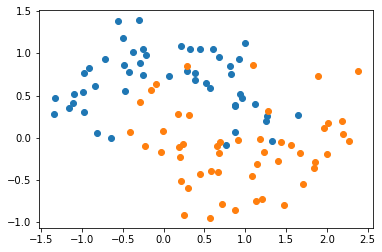

In [3]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


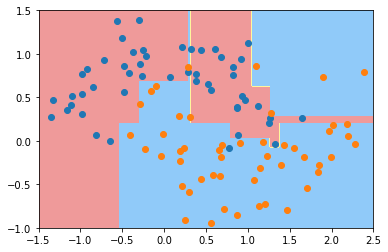

In [7]:
plot_decision_boundary(dt_clf,axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


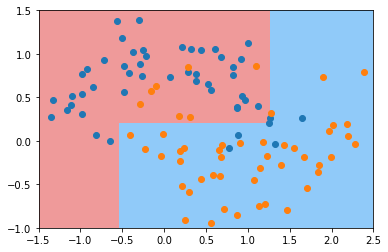

In [8]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)#树最大深度
dt_clf2.fit(X, y)

plot_decision_boundary(dt_clf2,axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


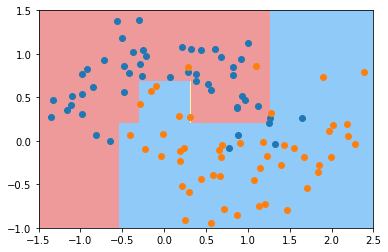

In [9]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)#拆分节点的最小数据数
dt_clf3.fit(X, y)

plot_decision_boundary(dt_clf3,axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


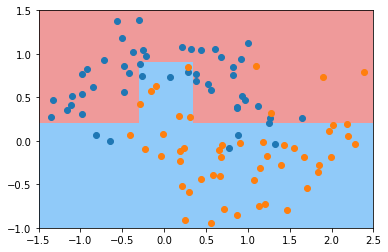

In [10]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)#叶子结点至少的样本数
dt_clf4.fit(X, y)

plot_decision_boundary(dt_clf4,axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


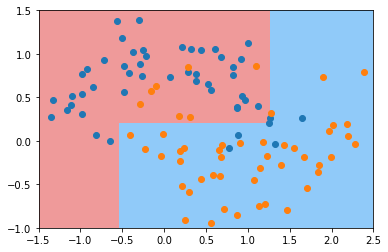

In [11]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)#最大的叶子结点数
dt_clf5.fit(X, y)

plot_decision_boundary(dt_clf5,axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

# 06 决策树回归

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [16]:
print('dt_reg.score test = ',dt_reg.score(X_test, y_test))
print('dt_reg.score train = ',dt_reg.score(X_train, y_train))

dt_reg.score test =  0.5926784538572891
dt_reg.score train =  1.0


出现了过拟合

# 07 决策树的局限性

- 决策边界是与坐标轴(维度)垂直的
- 对个别的数据敏感

## 并查集的局限性

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1),
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


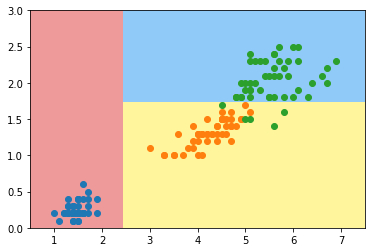

In [23]:
plot_decision_boundary(tree_clf,axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [24]:
X_new = np.delete(X, 138, axis=0)
y_new = np.delete(y, 138)

In [25]:
print("X_new.shape",X_new.shape)
print("y_new.shape",y_new.shape)

X_new.shape (149, 2)
y_new.shape (149,)


In [26]:
tree_clf2 = DecisionTreeClassifier(max_depth=2, criterion="entropy")
tree_clf2.fit(X_new, y_new)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

/Users/doublc.qluv/opt/anaconda3/envs/torch/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


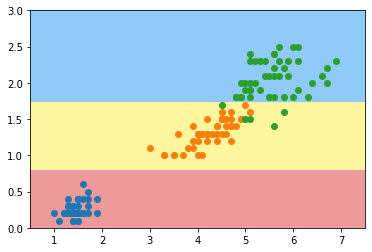

In [27]:
plot_decision_boundary(tree_clf2,axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()